<a href="https://colab.research.google.com/github/hargurjeet/Lending-Club-CaseStudy/blob/main/Lending_Club_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lending Club Case Study**

As an employee of a financial company specializing to disburse loans to urban customers, I am required to make a risk assessment model to help a company understand whether the loan disbursed to a customer is risky or not.

# **Table Of Contents**<a name="top"></a>


---



---


  1. [About the Dataset](#1)
  2. [Data Understanding](#2)
  3. [Expainatory Data Analysis](#3)
  4. [Summary & Key Conclusion](#11)
  5. [References](#13)

# 1: AboutDataset <a name="1"></a>


---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 

The dataset contains information about past loan applicants and whether they ‘defaulted’ or not. The dataset contains around 40k records and 111 featues having details fo customer bheavior and their loan history

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
! git clone https://github.com/hargurjeet/Lending-Club-CaseStudy.git

Cloning into 'Lending-Club-CaseStudy'...
remote: Enumerating objects: 81, done.
remote: Counting objects: 100% (81/81), done.
remote: Compressing objects: 100% (79/79), done.
remote: Total 81 (delta 43), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (81/81), done.


In [3]:
with zipfile.ZipFile("/content/Lending-Club-CaseStudy/loan.zip","r") as zip_ref:
    zip_ref.extractall("/content/Lending-Club-CaseStudy/")

# 2: Data Understanding <a name="2"></a>


---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 

In [4]:
file_path = r'/content/Lending-Club-CaseStudy/loan.csv'
df = pd.read_csv(file_path)
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [69]:
df.shape

(39717, 111)

In [6]:
df1 = pd.read_excel('/content/Lending-Club-CaseStudy/Data_Dictionary.xlsx')
df1

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
...,...,...
112,verification_status,"Indicates if income was verified by LC, not ve..."
113,verified_status_joint,Indicates if the co-borrowers' joint income wa...
114,zip_code,The first 3 numbers of the zip code provided b...
115,NaN,NaN


In [7]:
df.shape

(39717, 111)

In [8]:
def view_all(df):
  pd.set_option('display.max_rows', None)
  pd.set_option('max_columns', None)
  pd.set_option('display.max_colwidth', None)
  return df.style.set_properties(**{'text-align': 'left'})

view_all(df1)

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.
5,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
6,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/credit limit for all bankcard accounts.


## 2.1 Data Cleaning and Manipulation

Data quality issues are addressed in the right way (missing value imputation, outlier treatment and other kinds of data redundancies, etc.). 

 

If applicable, data is converted to a suitable and convenient format to work with using the right methods.

 

 

Manipulation of strings and dates is done correctly wherever required.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


## 2.2 Identifying missing values

In [10]:
# Checking the missing values
df.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [11]:
# Funtion to remove the columns where 50% of values are missing
def columns_with_high_missing_values_removed(df):
  missing_percent = (df.isnull().sum()/len(df))*100
  for feature, values in zip(missing_percent.index, missing_percent):
    if values >= 50:
      missing_percent.drop(feature, inplace=True)
  return missing_percent

df2 = columns_with_high_missing_values_removed(df)
df2

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [12]:
df2.shape

(54,)

In [13]:
# Filtering columns with low missing values
low_missing_values_col = df2.loc[lambda x:(x<50) & (x>0)].sort_values(ascending=False).index
low_missing_values_col

Index(['desc', 'emp_title', 'emp_length', 'pub_rec_bankruptcies',
       'last_pymnt_d', 'collections_12_mths_ex_med',
       'chargeoff_within_12_mths', 'revol_util', 'tax_liens', 'title',
       'last_credit_pull_d'],
      dtype='object')

In [14]:
df[low_missing_values_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   desc                        26777 non-null  object 
 1   emp_title                   37258 non-null  object 
 2   emp_length                  38642 non-null  object 
 3   pub_rec_bankruptcies        39020 non-null  float64
 4   last_pymnt_d                39646 non-null  object 
 5   collections_12_mths_ex_med  39661 non-null  float64
 6   chargeoff_within_12_mths    39661 non-null  float64
 7   revol_util                  39667 non-null  object 
 8   tax_liens                   39678 non-null  float64
 9   title                       39706 non-null  object 
 10  last_credit_pull_d          39715 non-null  object 
dtypes: float64(4), object(7)
memory usage: 3.3+ MB


In [15]:
df[low_missing_values_col].head()

,desc,emp_title,emp_length,pub_rec_bankruptcies,last_pymnt_d,collections_12_mths_ex_med,chargeoff_within_12_mths,revol_util,tax_liens,title,last_credit_pull_d
0,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,NaN,10+ years,0.0,Jan-15,0.0,0.0,83.70%,0.0,Computer,May-16
1,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br> Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>,Ryder,< 1 year,0.0,Apr-13,0.0,0.0,9.40%,0.0,bike,Sep-13
2,NaN,NaN,10+ years,0.0,Jun-14,0.0,0.0,98.50%,0.0,real estate business,May-16
3,"Borrower added on 12/21/11 > to pay for property tax (borrow from friend, need to pay back) & central A/C need to be replace. I'm very sorry to let my loan expired last time.<br>",AIR RESOURCES BOARD,10+ years,0.0,Jan-15,0.0,0.0,21%,0.0,personel,Apr-16
4,"Borrower added on 12/21/11 > I plan on combining three large interest bills together and freeing up some extra each month to pay toward other bills. I've always been a good payor but have found myself needing to make adjustments to my budget due to a medical scare. My job is very stable, I love it.<br>",University Medical Group,1 year,0.0,May-16,0.0,0.0,53.90%,0.0,Personal,May-16


In [16]:
## As the missing values of low and there is no logical ways of imputting them all
## Hence I am dropping the rows containing missing values
df3 = df[df2.index].dropna()
df3.shape

(24406, 54)

In [17]:
pd.reset_option('all')
pd.set_option('max_columns', None)
df3.head(2)

As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.

: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.0,0,Apr-99,5,3,0,1687,9.40%,4,f,0.0,0.0,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.0,0,Feb-96,1,10,0,5598,21%,37,f,0.0,0.0,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


## 2.3 Removing redundant columns

As the dataset contains high number of columns, Identifing redundant columns to simplify the data analysis

1. Id, Memberid columns are unique hence wont make sense to include these column in EDA.
2. The loan status "Current" can also be removed as we dont know if these loans would default or not in future.
3. Also removing the following customer behaviour columns which will not be avaliable at the type of loan application

`'delinq_2yers', 'earliest_cr_line, 'inq_last_6mnts', 'open_acc','pub_rec', 'revol_bal', 'revol_util', 'total_acc',  'out_prncp', 'out_prncp_inv','total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee','last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',       'collections_12_mths_ex_med','chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens','earliest_cr_line_Year', 'last_pymnt_Month','last_pymnt_Year', 'last_credit_pull_Month', 'last_credit_pull_Year'`


In [18]:
df3.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [19]:
relevant_cols=['loan_amnt', 'funded_amnt', 'funded_amnt_inv','term', 'int_rate', 'installment', 
               'grade', 'emp_length', 'sub_grade','home_ownership', 
               'annual_inc', 'verification_status', 'loan_status','purpose','issue_d']

df4 = df3[relevant_cols]

df4.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,issue_d
1,2500,2500,2500.0,60 months,15.27%,59.83,C,< 1 year,C4,RENT,30000.0,Source Verified,Charged Off,car,Dec-11
3,10000,10000,10000.0,36 months,13.49%,339.31,C,10+ years,C1,RENT,49200.0,Source Verified,Fully Paid,other,Dec-11
4,3000,3000,3000.0,60 months,12.69%,67.79,B,1 year,B5,RENT,80000.0,Source Verified,Current,other,Dec-11
6,7000,7000,7000.0,60 months,15.96%,170.08,C,8 years,C5,RENT,47004.0,Not Verified,Fully Paid,debt_consolidation,Dec-11
7,3000,3000,3000.0,36 months,18.64%,109.43,E,9 years,E1,RENT,48000.0,Source Verified,Fully Paid,car,Dec-11


In [20]:
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

## 2.4 Data Standardization

In [21]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24406 entries, 1 to 39623
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            24406 non-null  int64  
 1   funded_amnt          24406 non-null  int64  
 2   funded_amnt_inv      24406 non-null  float64
 3   term                 24406 non-null  object 
 4   int_rate             24406 non-null  object 
 5   installment          24406 non-null  float64
 6   grade                24406 non-null  object 
 7   emp_length           24406 non-null  object 
 8   sub_grade            24406 non-null  object 
 9   home_ownership       24406 non-null  object 
 10  annual_inc           24406 non-null  float64
 11  verification_status  24406 non-null  object 
 12  loan_status          24406 non-null  object 
 13  purpose              24406 non-null  object 
 14  issue_d              24406 non-null  object 
dtypes: float64(3), int64(2), object(10)


Following columns can be fixed to analyse them better
- Term, emp_length, Interest rate  - Can be converted to numberic values
- issue_d, earliest_cr_line, last_pymnt_d,last_credit_pull_d - Can be segegated to year and month for better analysis

In [22]:
## Fixing the numberic columns
df4.term = df4.term.apply(lambda x: x.strip(' months')).astype('int64')
df4.emp_length = df4.emp_length.apply(lambda x: x.strip(' years < year +')).astype('int64')
df4.int_rate = df4.int_rate.apply(lambda x: x.strip(' %')).astype('float')
df4[['Issue_Month', 'Issue_Year']] =df4.issue_d.str.split("-", expand = True)
df4[['Issue_Year']] = df4[['Issue_Year']].astype('int64')

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [23]:
df4.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,issue_d,Issue_Month,Issue_Year
1,2500,2500,2500.0,60,15.27,59.83,C,1,C4,RENT,30000.0,Source Verified,Charged Off,car,Dec-11,Dec,11
3,10000,10000,10000.0,36,13.49,339.31,C,10,C1,RENT,49200.0,Source Verified,Fully Paid,other,Dec-11,Dec,11
4,3000,3000,3000.0,60,12.69,67.79,B,1,B5,RENT,80000.0,Source Verified,Current,other,Dec-11,Dec,11
6,7000,7000,7000.0,60,15.96,170.08,C,8,C5,RENT,47004.0,Not Verified,Fully Paid,debt_consolidation,Dec-11,Dec,11
7,3000,3000,3000.0,36,18.64,109.43,E,9,E1,RENT,48000.0,Source Verified,Fully Paid,car,Dec-11,Dec,11


In [24]:
df4.shape

(24406, 17)

# 3: Explainatory Data Analysis <a name="3"></a>


---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 

## 3.1 Univariate Analysis - Categroical variables
Types of variable

cateforical variables

*   ordered
*   unordered


 
 

numberic variables

In [32]:
numberic_features = df4.select_dtypes(include='number').columns
numberic_features

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'emp_length', 'annual_inc', 'Issue_Year'],
      dtype='object')

In [33]:
categorical_features = df4.select_dtypes(include='object').columns
categorical_features

Index(['grade', 'sub_grade', 'home_ownership', 'verification_status',
       'loan_status', 'purpose', 'issue_d', 'Issue_Month'],
      dtype='object')

In [34]:
df4.select_dtypes(include='object').head()

,grade,sub_grade,home_ownership,verification_status,loan_status,purpose,issue_d,Issue_Month
1,C,C4,RENT,Source Verified,Charged Off,car,Dec-11,Dec
3,C,C1,RENT,Source Verified,Fully Paid,other,Dec-11,Dec
4,B,B5,RENT,Source Verified,Current,other,Dec-11,Dec
6,C,C5,RENT,Not Verified,Fully Paid,debt_consolidation,Dec-11,Dec
7,E,E1,RENT,Source Verified,Fully Paid,car,Dec-11,Dec


In [35]:
df4.loan_status.value_counts(normalize=True)

Fully Paid     0.835819
Charged Off    0.136360
Current        0.027821
Name: loan_status, dtype: float64

Loan status current does not hold significant value for approver to make the loan decision, Hence removing the status 'Current' from the analysis going forward

In [36]:
df4 = df4[~(df.loan_status=='Current')]
df4.loan_status.value_counts(normalize=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Fully Paid     0.859738
Charged Off    0.140262
Name: loan_status, dtype: float64

Text(0.5, 1.0, 'Loan Status')

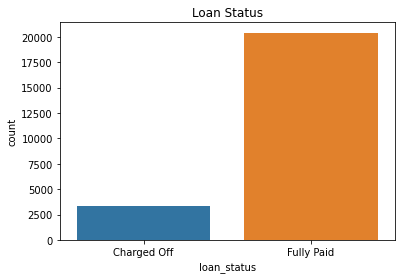

In [37]:
sns.countplot(x=df4.loan_status)
plt.title('Loan Status')

In [38]:
df4.grade.value_counts()

B    7183
A    6046
C    4882
D    3142
E    1682
F     611
G     181
Name: grade, dtype: int64

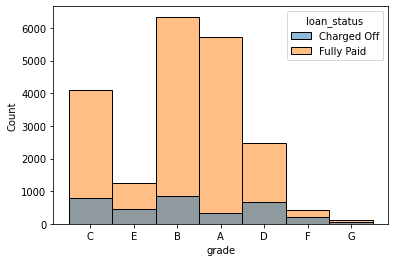

In [39]:
sns.histplot(x=df4.grade, hue=df4.loan_status)
plt.show()

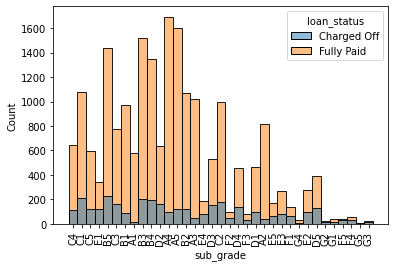

In [40]:
sns.histplot(x=df4.sub_grade, hue=df4.loan_status)
plt.xticks(rotation=90)
plt.show()

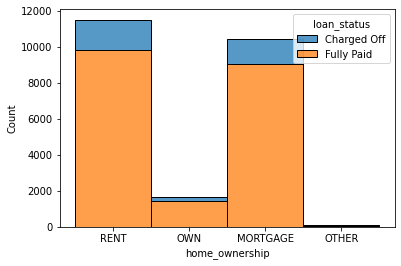

In [41]:
sns.histplot(x=df4.home_ownership, hue=df4.loan_status, multiple="stack")
plt.show()

People staying in rented and mortgage accomodation defaluted more than people staying in their own accomodation

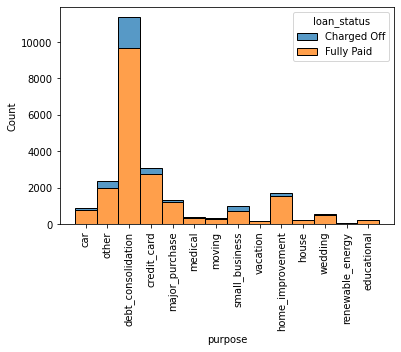

In [42]:
sns.histplot(x=df4.purpose, hue=df4.loan_status, multiple="stack")
plt.xticks(rotation=90)
plt.show()

People wiht debt consoidation has defaulted more

In [43]:
## Cosidering Verified and source verified would mean the same
# df4[df4.verification_status == 'Source Verified'].verification_status = 'Verified'
df4.loc[df['verification_status'] == 'Source Verified', 'verification_status'] = 'Verified'

In [44]:
df4.loan_status.value_counts()

Fully Paid     20399
Charged Off     3328
Name: loan_status, dtype: int64

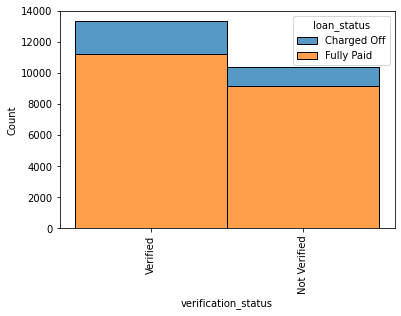

In [45]:
sns.histplot(x=df4.verification_status, hue=df4.loan_status, multiple="stack")
plt.xticks(rotation=90)
plt.show()

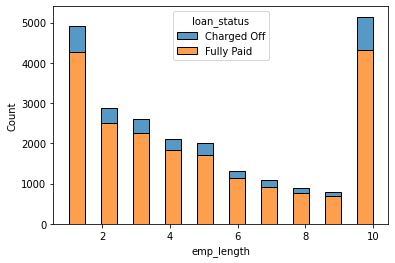

In [46]:
sns.histplot(x=df4.emp_length, hue=df4.loan_status, multiple="stack")

## 3.2 Univariate Analysis - Quantitative variables

In [47]:
 df4.select_dtypes(include='number').head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,Issue_Year
1,2500,2500,2500.0,60,15.27,59.83,1,30000.0,11
3,10000,10000,10000.0,36,13.49,339.31,10,49200.0,11
6,7000,7000,7000.0,60,15.96,170.08,8,47004.0,11
7,3000,3000,3000.0,36,18.64,109.43,9,48000.0,11
9,5375,5375,5350.0,60,12.69,121.45,1,15000.0,11


In [48]:
df4.loan_amnt.describe()

count    23727.000000
mean     11459.971762
std       7243.030746
min        500.000000
25%       6000.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [49]:
df4[df4.funded_amnt_inv>df4.loan_amnt]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,issue_d,Issue_Month,Issue_Year


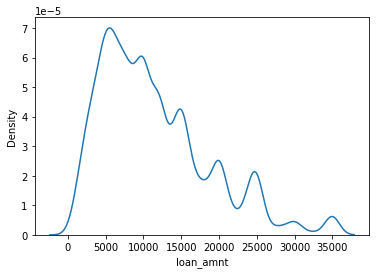

In [50]:
sns.kdeplot(data=df4, x="loan_amnt")

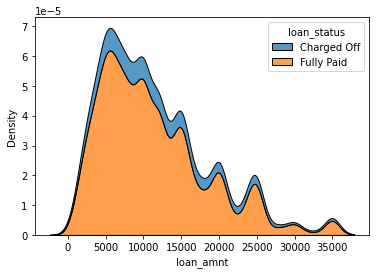

In [51]:
sns.kdeplot(data=df4, x="loan_amnt", hue='loan_status', multiple="stack")

In [52]:
df4["loan_amnt"].value_counts()

10000    1740
12000    1482
15000    1254
5000     1166
6000     1141
         ... 
3925        1
15425       1
15175       1
12225       1
23575       1
Name: loan_amnt, Length: 753, dtype: int64

In [53]:
df_good = df4.loc[df4["loan_status"] == 'Charged Off']['loan_status'].values.tolist()

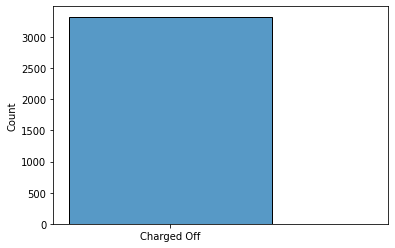

In [54]:

sns.histplot(x=df_good)

In [55]:
df4.Issue_Year.value_counts()

11    11140
10     7203
9      4327
8      1053
7         4
Name: Issue_Year, dtype: int64

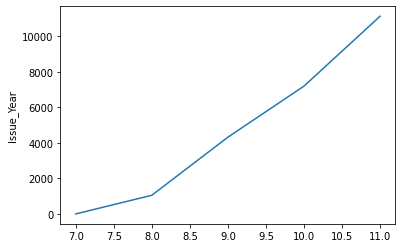

In [56]:
sns.lineplot(x=df4.Issue_Year.value_counts().index , y=df4.Issue_Year.value_counts())
plt.show()

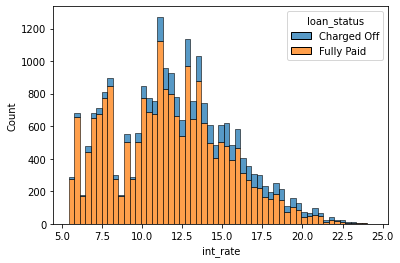

In [57]:
sns.histplot(x=df4.int_rate, hue=df4.loan_status, multiple="stack")
plt.show()

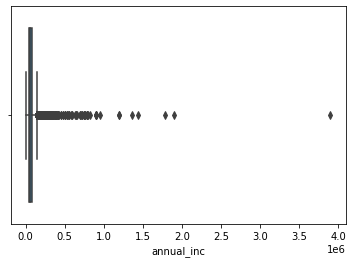

In [58]:
sns.boxplot(df4.annual_inc)

In [59]:
df4[df4.annual_inc<=150000].annual_inc

1         30000.00
3         49200.00
6         47004.00
7         48000.00
9         15000.00
           ...    
39433     96000.00
39475    100671.39
39551     80000.00
39562     35000.00
39623     39000.00
Name: annual_inc, Length: 22868, dtype: float64

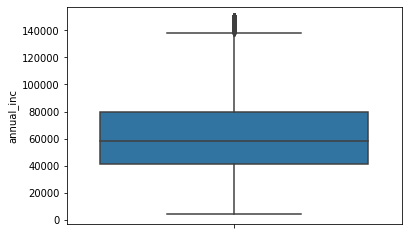

In [60]:
sns.boxplot(y=df4[df4.annual_inc<=150000].annual_inc)

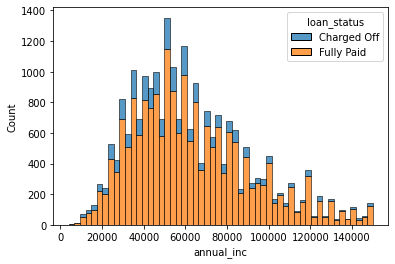

In [61]:
sns.histplot(x=df4[df4.annual_inc<=150000].annual_inc, hue=df4.loan_status, multiple="stack")

## 3.3 Improtant factor for default 
1. interest rate
2. loan amount
3. grade
4. annual income
5. home_ownership
6. purpose

## 3.4 Bivariate Analysis

Bivariate analysis is performed correctly and is able to identify the important combinations of driver variables. The combinations of variables are chosen such that they make business or analytical sense.

In [62]:
df4.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,issue_d,Issue_Month,Issue_Year
1,2500,2500,2500.0,60,15.27,59.83,C,1,C4,RENT,30000.0,Verified,Charged Off,car,Dec-11,Dec,11
3,10000,10000,10000.0,36,13.49,339.31,C,10,C1,RENT,49200.0,Verified,Fully Paid,other,Dec-11,Dec,11
6,7000,7000,7000.0,60,15.96,170.08,C,8,C5,RENT,47004.0,Not Verified,Fully Paid,debt_consolidation,Dec-11,Dec,11
7,3000,3000,3000.0,36,18.64,109.43,E,9,E1,RENT,48000.0,Verified,Fully Paid,car,Dec-11,Dec,11
9,5375,5375,5350.0,60,12.69,121.45,B,1,B5,RENT,15000.0,Verified,Charged Off,other,Dec-11,Dec,11


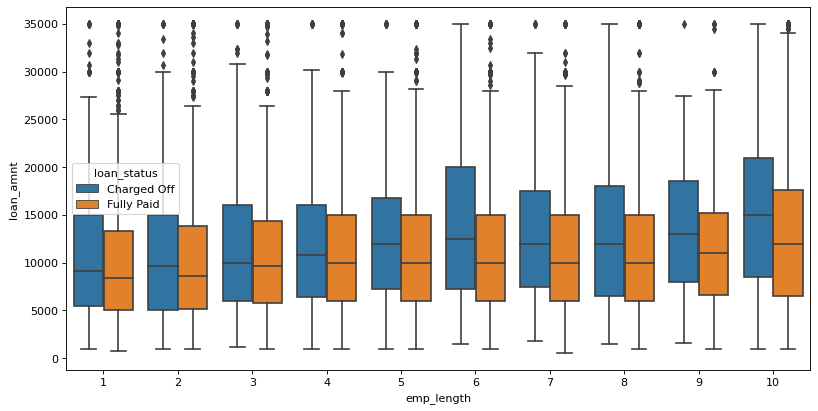

In [63]:
from matplotlib.pyplot import figure

figure(figsize=(12, 6), dpi=80)
plt.legend(loc='upper left')

sns.boxplot(x=df4.emp_length, y=df4.loan_amnt, hue=df4.loan_status)

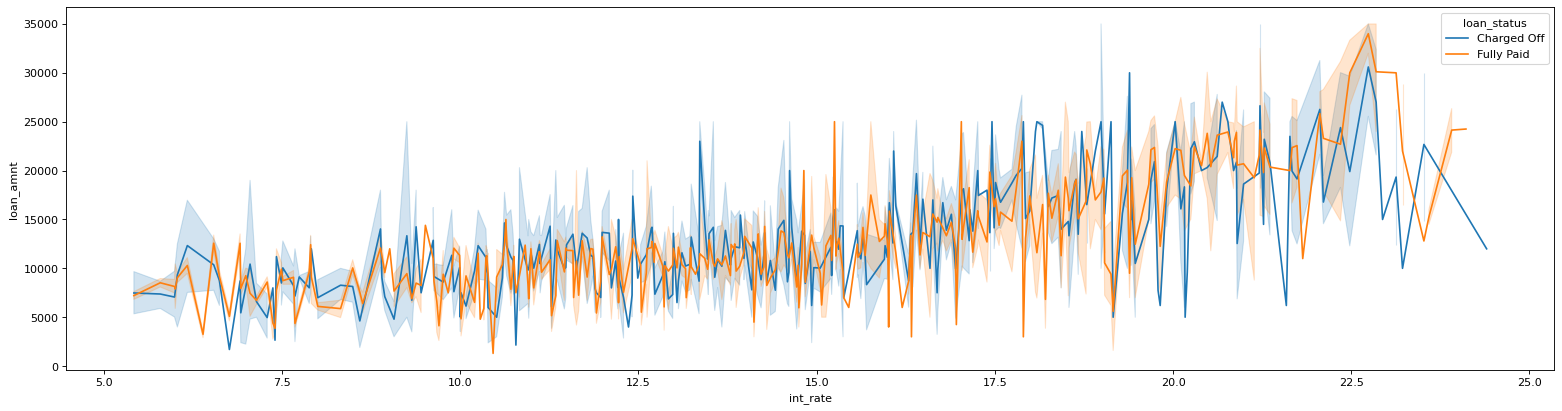

In [64]:
figure(figsize=(24, 6), dpi=80)
sns.lineplot(x=df4.int_rate, y=df4.loan_amnt, hue=df4.loan_status)
# sns.barplot(x=df4.int_rate, y=df4.loan_amnt, hue=df4.loan_status)

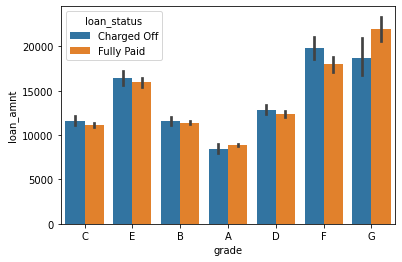

In [65]:
sns.barplot(x=df4.grade, y=df4.loan_amnt, hue=df4.loan_status)

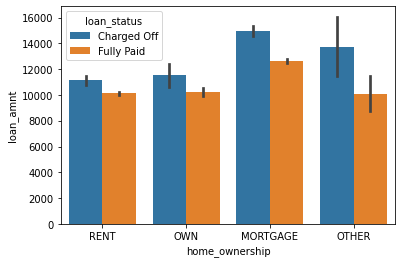

In [66]:
sns.barplot(x=df4.home_ownership, y=df4.loan_amnt, hue=df4.loan_status)

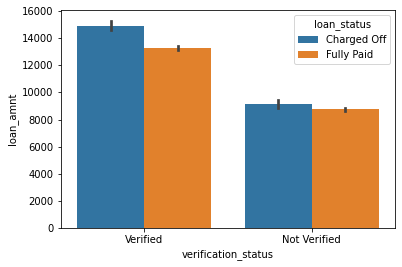

In [67]:
sns.barplot(x=df4.verification_status, y=df4.loan_amnt, hue=df4.loan_status)

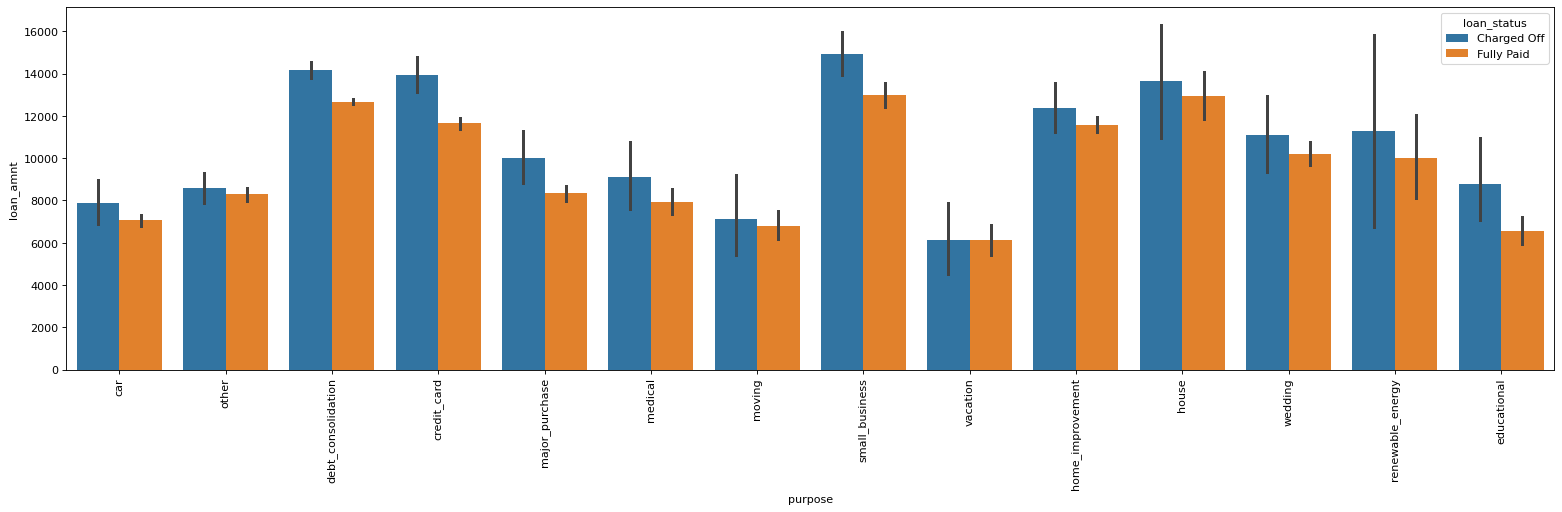

In [68]:
figure(figsize=(24, 6), dpi=80)
sns.barplot(x=df4.purpose, y=df4.loan_amnt, hue=df4.loan_status)
plt.xticks(rotation=90)
plt.show()

# 4: Summary & Key Conclusion <a name="4"></a>


---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 

# 5: References <a name="5"></a>


---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 